<a href="https://colab.research.google.com/github/AnannyaSagar/GreedyGame_assignment/blob/main/GreedyGame_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
user_signup = pd.read_csv("/content/drive/MyDrive/Greedy Game/Q2_users signup.csv")
offer_initiation = pd.read_csv("/content/drive/MyDrive/Greedy Game/Q2_User offer data.csv")
offer_completion = pd.read_csv("/content/drive/MyDrive/Greedy Game/Q2_User offer completion data.csv")
rewards = pd.read_csv("/content/drive/MyDrive/Greedy Game/Q2_rewards details.csv")

## 1. user_signup data

Looking at the top five rows of user_signup data

In [ ]:
user_signup.head()

,user_id,app_id,signed_up_on,last_login_date
0,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,26-11-2022,26-11-2022
1,7cdb9d2c-9644-42d0-8d44-50fa57747523,sikka,26-11-2022,26-11-2022
2,e2dfd115-a8b0-4e3e-96e5-9b11e5f316f1,sikka,26-11-2022,28-11-2022
3,f55000a3-dd68-44d8-b461-41c85d963ce2,sikka,26-11-2022,27-11-2022
4,a6d5ed73-5c1c-4666-a592-f93ab4489cf5,sikka,26-11-2022,26-11-2022


Analysis of the columns and their types

In [ ]:
user_signup.dtypes

user_id            object
app_id             object
signed_up_on       object
last_login_date    object
dtype: object

Looking for null_values

In [ ]:
user_signup.isnull().sum()

user_id            0
app_id             0
signed_up_on       0
last_login_date    0
dtype: int64

There are no null values in the user_signup dataset.

Shape of user_signup data

In [ ]:
user_signup.shape

(100, 4)

Converting last_login_date and signed_up_on into datetime format

In [ ]:
#Using to_datetime() to convert into datetime format
user_signup['last_login_date'] = pd.to_datetime(user_signup['last_login_date']).dt.date
user_signup['signed_up_on'] = pd.to_datetime(user_signup['signed_up_on'])

In [ ]:
user_signup.dtypes

user_id                    object
app_id                     object
signed_up_on       datetime64[ns]
last_login_date            object
dtype: object

2. offer_initiation data

Looking at top five rows

In [ ]:
offer_initiation.head()

,Unnamed: 0,user_id,offer_id,status,started_at,completed_at,expires_at
0,0,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,792,ONGOING,2022-11-26 07:25:38.995614+00:00,NaN,2022-11-27 18:29:59+00:00
1,1,e5c792a3-9cd9-4d10-a7b5-e5ee0f0f5fad,3462,ONGOING,2022-11-26 01:19:42.059483+00:00,NaN,2022-11-28 01:19:42.066140+00:00
2,2,033c38d4-fd46-45a2-b09a-18d637c54129,3462,ONGOING,2022-11-26 14:12:39.365453+00:00,NaN,2022-11-28 14:12:39.369689+00:00
3,3,8a488246-83d3-4028-b216-85ee8c3e504d,2328,ONGOING,2022-11-26 02:51:44.438026+00:00,NaN,2022-11-28 02:51:44.441869+00:00
4,4,aff26172-41d6-4e69-9b02-48011fe35804,3467,ONGOING,2022-11-26 11:44:25.915581+00:00,NaN,2022-11-28 11:44:25.921249+00:00


In [ ]:
offer_initiation.shape

(499, 7)

In [ ]:
offer_initiation.isnull().sum()

Unnamed: 0        0
user_id           0
offer_id          0
status            0
started_at        0
completed_at    436
expires_at       63
dtype: int64

There are 436 null values in the completed_at column of the dataset. And 63 values at expires_at.

In [ ]:
offer_initiation['status'].value_counts()

ONGOING      436
COMPLETED     63
Name: status, dtype: int64

There are 436 values with ongoing status. Therefore the null values are for those users whose offer is still ongoing. 

We will replace the null values in the completed at column by "not completed"

We will drop the "Unnamed:0" column

In [ ]:
offer_initiation['started_at'] = pd.to_datetime(offer_initiation['started_at'])

In [ ]:
offer_initiation = offer_initiation.drop('Unnamed: 0',axis=1)

In [ ]:
offer_initiation.columns

Index(['user_id', 'offer_id', 'status', 'started_at', 'completed_at',
       'expires_at'],
      dtype='object')

# 3. offer_completion data

In [ ]:
offer_completion.head()

,Unnamed: 0,reward_id,user_id,date,app_id
0,0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
1,1,935,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
2,2,3416,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,2022-11-28,sikka
3,3,3720,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,2022-11-27,sikka
4,4,3735,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka


In [ ]:
offer_completion.shape

(70, 5)

In [ ]:
offer_completion.isnull().sum()

Unnamed: 0    0
reward_id     0
user_id       0
date          0
app_id        0
dtype: int64

In [ ]:
offer_completion.dtypes

Unnamed: 0     int64
reward_id      int64
user_id       object
date          object
app_id        object
dtype: object

In [ ]:
offer_completion['date'] = pd.to_datetime(offer_completion['date'])

Dropping the "Unnamed:0" column from the dataset 

In [ ]:
offer_completion = offer_completion.drop('Unnamed: 0',axis = 1)

3. Rewards Details data

In [ ]:
rewards.head()

,Unnamed: 0,offer_id,reward_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,0,369,451,Download APK,500,0
1,1,400,488,Download,30,0
2,2,402,491,Download,500,0
3,3,447,541,Register on App,500,0
4,4,478,586,Complete Registration,500,0


In [ ]:
rewards.shape

(2716, 6)

In [ ]:
rewards.isnull().sum()

Unnamed: 0                 0
offer_id                   0
reward_id                  0
label_in_english          15
total_payout_in_paise      0
total_revenue_in_paise     0
dtype: int64

Let us carry out the required analyis to find which app performs better "Sikka" or "Sikka Pro"

Firstly, let us analyse offer Initiation by users

To carry out the analysis we will first merge the datasets user_signup and offer_initiation.

In [ ]:
user_signup.shape

(100, 4)

In [ ]:
user_signup.columns

Index(['user_id', 'app_id', 'signed_up_on', 'last_login_date'], dtype='object')

In [ ]:
offer_initiation.columns

Index(['user_id', 'offer_id', 'status', 'started_at', 'completed_at',
       'expires_at'],
      dtype='object')

In [ ]:
#Merge datasets user_signup and offer_initiation.
user_initiation_data = pd.merge(user_signup,offer_initiation,on='user_id')

In [ ]:
user_initiation_data.head()

,user_id,app_id,signed_up_on,last_login_date,offer_id,status,started_at,completed_at,expires_at
0,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3534,ONGOING,2022-11-26 00:05:44.859932+00:00,NaN,2022-11-28 00:05:44.865124+00:00
1,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3505,ONGOING,2022-11-26 00:19:47.467175+00:00,NaN,2022-11-28 00:19:47.470456+00:00
2,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3237,ONGOING,2022-11-26 00:20:42.687283+00:00,NaN,2022-11-28 00:20:42.692107+00:00
3,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3451,ONGOING,2022-11-26 00:21:33.127670+00:00,NaN,2022-11-28 00:21:33.133124+00:00
4,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,792,ONGOING,2022-11-26 00:26:52.872562+00:00,NaN,2022-11-27 18:29:59+00:00


In [ ]:
user_initiation_data.dtypes

user_id                         object
app_id                          object
signed_up_on            datetime64[ns]
last_login_date                 object
offer_id                         int64
status                          object
started_at         datetime64[ns, UTC]
completed_at                    object
expires_at                      object
dtype: object

In [ ]:
user_initiation_data.isnull().sum()

user_id              0
app_id               0
signed_up_on         0
last_login_date      0
offer_id             0
status               0
started_at           0
completed_at       436
expires_at          63
dtype: int64

In [ ]:
offer_initiation_by_app = user_initiation_data.groupby(['app_id','started_at'])['user_id'].count()

In [ ]:
user_initiation_data.groupby(['app_id','started_at'])['user_id'].count()

app_id     started_at                      
sikka      2022-11-26 00:03:03.462440+00:00    1
           2022-11-26 00:04:13.885525+00:00    1
           2022-11-26 00:05:38.867282+00:00    1
           2022-11-26 00:05:44.859932+00:00    1
           2022-11-26 00:06:18.862567+00:00    1
                                              ..
sikka_pro  2022-11-29 07:13:49.719542+00:00    1
           2022-11-29 07:35:05.496512+00:00    1
           2022-11-29 08:03:35.042177+00:00    1
           2022-11-29 09:30:42.164276+00:00    1
           2022-11-29 10:20:30.486481+00:00    1
Name: user_id, Length: 499, dtype: int64

In [ ]:
offer_initiation_by_app = pd.DataFrame(offer_initiation_by_app).reset_index()

In [ ]:
user_initiation_data.groupby(['app_id','signed_up_on'])['user_id'].count()

app_id     signed_up_on
sikka      2022-11-26      262
sikka_pro  2022-11-26      237
Name: user_id, dtype: int64

In [ ]:
user_initiation_data['started_date'] = user_initiation_data['started_at'].dt.date

In [ ]:
users_by_app_per_day = user_initiation_data.groupby(['app_id','started_date'])['user_id'].count().reset_index()

In [ ]:
users_by_app_per_day = users_by_app_per_day.rename(columns = {'user_id':'user_count'})

In [ ]:
users_by_app_per_day

,app_id,started_date,user_count
0,sikka,2022-11-26,177
1,sikka,2022-11-27,28
2,sikka,2022-11-28,35
3,sikka,2022-11-29,22
4,sikka_pro,2022-11-26,111
5,sikka_pro,2022-11-27,48
6,sikka_pro,2022-11-28,54
7,sikka_pro,2022-11-29,24


In [ ]:
users_by_app_per_day.dtypes

app_id          object
started_date    object
user_count       int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

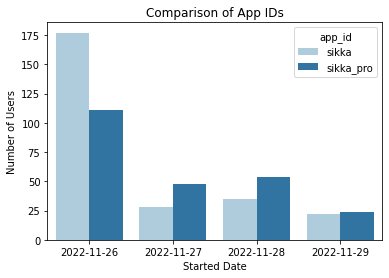

In [ ]:
sns.barplot(y='user_count', x='started_date', data=users_by_app_per_day, hue='app_id',palette = 'Paired')
plt.xlabel('Started Date')
plt.ylabel('Number of Users')
plt.title('Comparison of App IDs')
plt.show()

In [ ]:
users_per_app = user_initiation_data.groupby('app_id')['user_id'].count().reset_index()

In [ ]:
users_per_app

,app_id,user_id
0,sikka,262
1,sikka_pro,237


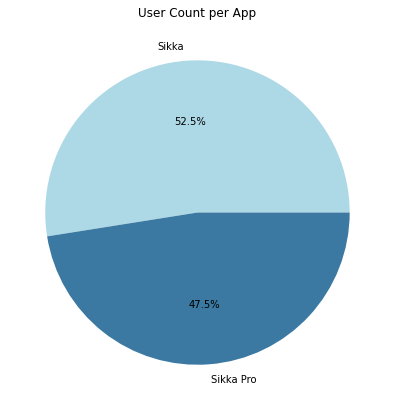

In [ ]:
plt.figure(figsize = [7,7])
sns.color_palette(palette="Paired")
plt.pie(users_per_app['user_id'],labels = ['Sikka',"Sikka Pro"], autopct='%1.1f%%',colors = ['#add8e6','#3b79a2'])
plt.title('User Count per App')
plt.show()

Offer Completion by users

In [ ]:
offer_completion['date'] = offer_completion['date'].dt.date

In [ ]:
users_offer_completed_per_app_per_day = offer_completion.groupby(['app_id','date'])['user_id'].count().reset_index()

In [ ]:
users_offer_completed_per_app_per_day = users_offer_completed_per_app_per_day.rename(columns = {'user_id':'user_count'})

In [ ]:
users_offer_completed_per_app_per_day.dtypes

app_id        object
date          object
user_count     int64
dtype: object

In [ ]:
users_offer_completed_per_app_per_day

,app_id,date,user_count
0,sikka,2022-11-26,15
1,sikka,2022-11-27,2
2,sikka,2022-11-28,5
3,sikka,2022-11-29,5
4,sikka_pro,2022-11-26,19
5,sikka_pro,2022-11-27,8
6,sikka_pro,2022-11-28,10
7,sikka_pro,2022-11-29,6


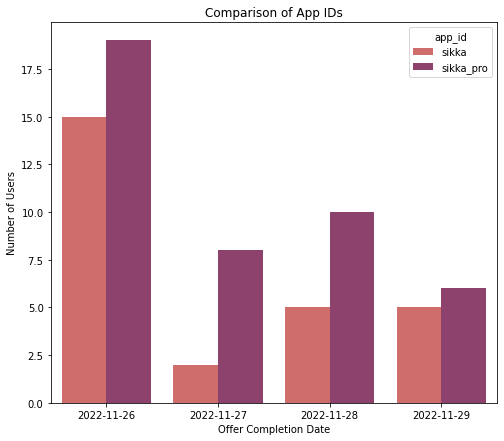

In [ ]:

plt.figure(figsize= (8,7))
sns.barplot(y='user_count', x='date', data=users_offer_completed_per_app_per_day, hue='app_id', palette ='flare')
plt.xlabel('Offer Completion Date')
plt.ylabel('Number of Users')
plt.title('Comparison of App IDs')
plt.show()

In [ ]:
offerCompletionUsers_per_app = offer_completion.groupby('app_id')['user_id'].count().reset_index()

In [ ]:
offerCompletionUsers_per_app

,app_id,user_id
0,sikka,27
1,sikka_pro,43


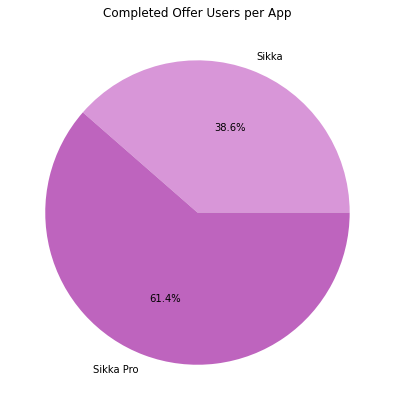

In [ ]:
plt.figure(figsize = [7,7])
plt.pie(offerCompletionUsers_per_app['user_id'],labels = ['Sikka',"Sikka Pro"], autopct='%1.1f%%',colors = ['#d896d8','#be64be'])
plt.title('Completed Offer Users per App')
plt.show()

Rewards earned by users

In [ ]:
#Merging offer completion data and rewards detaild dataset

rewards_earned = pd.merge(offer_completion,rewards, on = 'reward_id')

In [ ]:
rewards_earned.head()

,reward_id,user_id,date,app_id,Unnamed: 0,offer_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,2678,3520,Complete Registration,500,1758
1,935,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,441,792,Complete Registration,200,0
2,935,c925ccad-98e7-4500-833e-a49aa066aeec,2022-11-26,sikka,441,792,Complete Registration,200,0
3,935,3db62aad-421b-474e-9b1e-8a88ff370d4f,2022-11-26,sikka,441,792,Complete Registration,200,0
4,935,805763d6-87b3-40c7-bb84-dd663669c836,2022-11-27,sikka_pro,441,792,Complete Registration,200,0


In [ ]:
rewards_earned.shape

(70, 9)

In [ ]:
rewards_earned.isnull().sum()

reward_id                 0
user_id                   0
date                      0
app_id                    0
Unnamed: 0                0
offer_id                  0
label_in_english          0
total_payout_in_paise     0
total_revenue_in_paise    0
dtype: int64

In [ ]:
rewards_earned = rewards_earned.drop("Unnamed: 0",axis =1)

In [ ]:
rewards_earned_per_app = rewards_earned.groupby('app_id')['total_payout_in_paise'].sum().reset_index()

In [ ]:
rewards_earned_per_app

,app_id,total_payout_in_paise
0,sikka,18466
1,sikka_pro,19618


In [ ]:
num_rewards_earned_per_app = rewards_earned.groupby('app_id')['user_id'].count().reset_index()

In [ ]:
num_rewards_earned_per_app

,app_id,user_id
0,sikka,27
1,sikka_pro,43


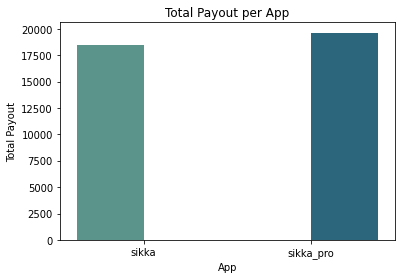

In [ ]:
sns.barplot(y='total_payout_in_paise', x='app_id', data= rewards_earned_per_app, hue='app_id',palette = 'crest')
plt.xlabel('App')
plt.ylabel('Total Payout')
plt.title('Total Payout per App')
plt.legend('',frameon=False)
plt.show()

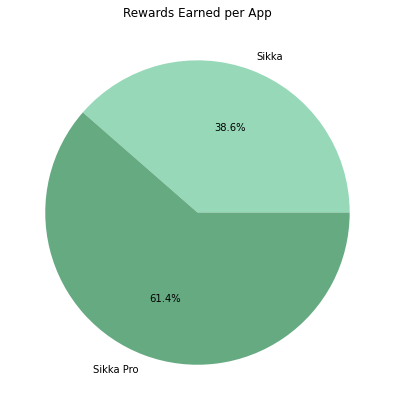

In [ ]:


plt.figure(figsize = [7,7])
sns.color_palette(palette="Paired")
plt.pie(num_rewards_earned_per_app['user_id'],labels = ['Sikka',"Sikka Pro"], autopct='%1.1f%%',colors = ['#96d8b8','#66aa82'])
plt.title('Rewards Earned per App')
plt.show()

Revenue generated per app

In [ ]:

#Merging offer completion data and rewards detaild dataset

revenue =pd.merge(user_signup,rewards_earned, on = ['user_id','app_id'])

In [ ]:
revenue

,user_id,app_id,signed_up_on,last_login_date,reward_id,date,offer_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,935,2022-11-26,792,Complete Registration,200,0
1,f55000a3-dd68-44d8-b461-41c85d963ce2,sikka,2022-11-26,2022-11-27,3172,2022-11-26,2945,Download,34,100
2,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,sikka,2022-11-26,2022-11-29,935,2022-11-26,792,Complete Registration,200,0
3,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,sikka,2022-11-26,2022-11-29,3720,2022-11-27,3528,Complete Registration.,250,700
4,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,sikka,2022-11-26,2022-11-29,3702,2022-11-26,3510,Register,600,2000
...,...,...,...,...,...,...,...,...,...,...
65,805763d6-87b3-40c7-bb84-dd663669c836,sikka_pro,2022-11-26,2022-11-27,3156,2022-11-27,2931,Download,50,300
66,805763d6-87b3-40c7-bb84-dd663669c836,sikka_pro,2022-11-26,2022-11-27,3572,2022-11-27,3382,Register,800,4000
67,792b3da8-618b-4bbe-996c-63f45820327a,sikka_pro,2022-11-26,2022-11-27,3172,2022-11-26,2945,Download,34,100
68,0e205d6d-d50b-4dba-a0cd-0355b4f2cc49,sikka_pro,2022-11-26,2022-11-29,3722,2022-11-29,3529,Install,200,600


In [ ]:
revenue_per_app = revenue.groupby("app_id")['total_revenue_in_paise'].sum().reset_index()

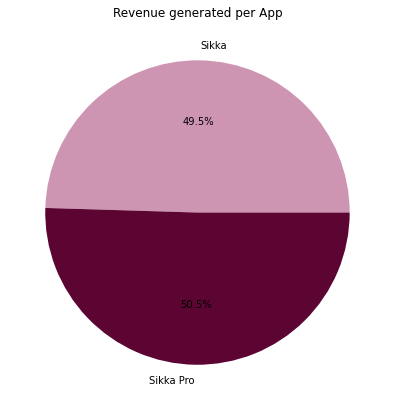

In [ ]:
plt.figure(figsize = [7,7])
sns.color_palette(palette="Paired")
plt.pie(revenue_per_app['total_revenue_in_paise'],labels = ['Sikka',"Sikka Pro"], autopct='%1.1f%%',colors = ['#ce95b2','#5c0432'])
plt.title('Revenue generated per App')
plt.show()

In [ ]:
revenue_per_app_per_day = revenue.groupby(["app_id","last_login_date"])['total_revenue_in_paise'].sum().reset_index()

In [ ]:
revenue_per_app_per_day['total_revenue'] = revenue_per_app_per_day['total_revenue_in_paise']/100

In [ ]:
revenue_per_app_per_day

,app_id,last_login_date,total_revenue_in_paise,total_revenue
0,sikka,2022-11-26,2706,27.06
1,sikka,2022-11-27,100,1.00
2,sikka,2022-11-28,800,8.00
3,sikka,2022-11-29,36081,360.81
4,sikka_pro,2022-11-26,6625,66.25
5,sikka_pro,2022-11-27,6600,66.00
6,sikka_pro,2022-11-28,4104,41.04
7,sikka_pro,2022-11-29,23128,231.28


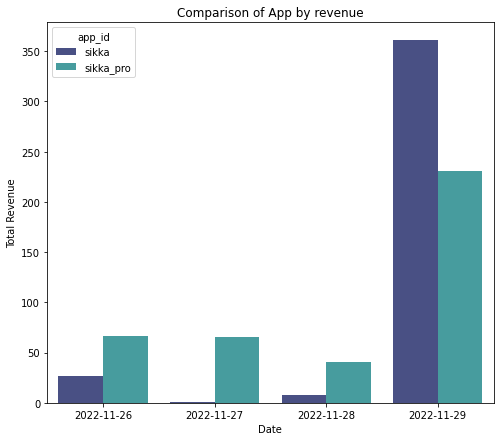

In [ ]:

plt.figure(figsize= (8,7))
sns.barplot(y='total_revenue', x='last_login_date', data=revenue_per_app_per_day, hue='app_id', palette ='mako')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Comparison of App by revenue')
plt.show()

# 3.Predicting the number of referrals for the first 15 days of November

In [ ]:
#Read the dataset
sikka_data = pd.read_csv("/content/drive/MyDrive/Greedy Game/Q3_Sikka data.csv")

In [ ]:
#Top five rows
sikka_data.head()

,Date,DAU,Installs,Uninstalls,Signups,Referrals
0,01-10-2022,24071,6630,6994,3511,962.0
1,02-10-2022,23548,6366,6669,3387,941.0
2,03-10-2022,24572,6936,6899,3654,940.0
3,04-10-2022,24212,6561,6766,3532,960.0
4,05-10-2022,23247,6059,6402,3315,923.0


In [ ]:
#converting into datetime type
sikka_data['Date'] = pd.to_datetime(sikka_data['Date']).dt.date

In [ ]:
# Create lagged variables for Referrals, Installs, Uninstalls, Signups, and DAU
sikka_data['Referrals_lag1'] = sikka_data['Referrals'].shift(1)
sikka_data['Referrals_lag2'] = sikka_data['Referrals'].shift(2)
sikka_data['Referrals_lag3'] = sikka_data['Referrals'].shift(3)

sikka_data['Installs_lag1'] = sikka_data['Installs'].shift(1)
sikka_data['Installs_lag2'] = sikka_data['Installs'].shift(2)
sikka_data['Installs_lag3'] = sikka_data['Installs'].shift(3)

sikka_data['Uninstalls_lag1'] = sikka_data['Uninstalls'].shift(1)
sikka_data['Uninstalls_lag2'] = sikka_data['Uninstalls'].shift(2)
sikka_data['Uninstalls_lag3'] = sikka_data['Uninstalls'].shift(3)

sikka_data['Signups_lag1'] = sikka_data['Signups'].shift(1)
sikka_data['Signups_lag2'] = sikka_data['Signups'].shift(2)
sikka_data['Signups_lag3'] = sikka_data['Signups'].shift(3)

sikka_data['DAU_lag1'] = sikka_data['DAU'].shift(1)
sikka_data['DAU_lag2'] = sikka_data['DAU'].shift(2)
sikka_data['DAU_lag3'] = sikka_data['DAU'].shift(3)

# # Drop the rows with missing values
# sikka_data.dropna(inplace=True)

In [ ]:
sikka_data.head()

,Date,DAU,Installs,Uninstalls,Signups,Referrals,Referrals_lag1,Referrals_lag2,Referrals_lag3,Installs_lag1,...,Installs_lag3,Uninstalls_lag1,Uninstalls_lag2,Uninstalls_lag3,Signups_lag1,Signups_lag2,Signups_lag3,DAU_lag1,DAU_lag2,DAU_lag3
0,2022-01-10,24071,6630,6994,3511,962.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-10,23548,6366,6669,3387,941.0,962.0,NaN,NaN,6630.0,...,NaN,6994.0,NaN,NaN,3511.0,NaN,NaN,24071.0,NaN,NaN
2,2022-03-10,24572,6936,6899,3654,940.0,941.0,962.0,NaN,6366.0,...,NaN,6669.0,6994.0,NaN,3387.0,3511.0,NaN,23548.0,24071.0,NaN
3,2022-04-10,24212,6561,6766,3532,960.0,940.0,941.0,962.0,6936.0,...,6630.0,6899.0,6669.0,6994.0,3654.0,3387.0,3511.0,24572.0,23548.0,24071.0
4,2022-05-10,23247,6059,6402,3315,923.0,960.0,940.0,941.0,6561.0,...,6366.0,6766.0,6899.0,6669.0,3532.0,3654.0,3387.0,24212.0,24572.0,23548.0


In [ ]:
sikka_data.drop(sikka_data.index[:3], inplace=True)

In [ ]:
sikka_data.columns

Index(['Date', 'DAU', 'Installs', 'Uninstalls', 'Signups', 'Referrals',
       'Referrals_lag1', 'Referrals_lag2', 'Referrals_lag3', 'Installs_lag1',
       'Installs_lag2', 'Installs_lag3', 'Uninstalls_lag1', 'Uninstalls_lag2',
       'Uninstalls_lag3', 'Signups_lag1', 'Signups_lag2', 'Signups_lag3',
       'DAU_lag1', 'DAU_lag2', 'DAU_lag3'],
      dtype='object')

In [ ]:
# separate the input features (lagged data) and the output (referrals)
X = sikka_data[['DAU_lag1', 'DAU_lag2', 'DAU_lag3', 'Installs_lag1', 'Installs_lag2', 'Installs_lag3',
        'Uninstalls_lag1', 'Uninstalls_lag2', 'Uninstalls_lag3', 'Signups_lag1', 'Signups_lag2',
        'Signups_lag3']]
y = sikka_data['Referrals']

In [ ]:
X_train = X.iloc[:-15, 1:-1]
y_train = y.iloc[:-15]
X_test = X.iloc[-15:, 1:-1]

In [ ]:
# fit the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test.columns

Index(['DAU_lag2', 'DAU_lag3', 'Installs_lag1', 'Installs_lag2',
       'Installs_lag3', 'Uninstalls_lag1', 'Uninstalls_lag2',
       'Uninstalls_lag3', 'Signups_lag1', 'Signups_lag2'],
      dtype='object')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Predicted number of referrals for the first 15 days of November:")
print(y_pred)

Predicted number of referrals for the first 15 days of November:
[414.92742246 430.65958968 461.80553207 503.01994473 467.7958955
 502.30764093 511.4636717  471.56708182 532.83000326 574.46430482
 837.78249858 598.21200049 666.62957078 687.57332909 562.0378825 ]


In [ ]:
df = sikka_data['Date'][-15:] 

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df['Predicted_Referrals'] = y_pred

In [ ]:
df

,Date,Predicted_Referrals
31,2022-01-11,414.927422
32,2022-02-11,430.659590
33,2022-03-11,461.805532
34,2022-04-11,503.019945
35,2022-05-11,467.795895
36,2022-06-11,502.307641
37,2022-07-11,511.463672
38,2022-08-11,471.567082
39,2022-09-11,532.830003
40,2022-10-11,574.464305


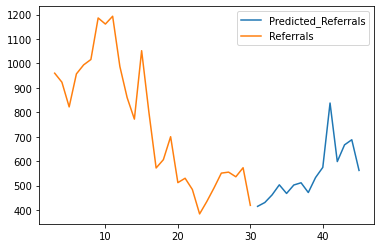

In [ ]:
df['Predicted_Referrals'].plot(legend=True)
sikka_data['Referrals'][:-15].plot(legend=True)

4. Anomaly Detection on ADX_data

In [6]:
ADX_data = pd.read_csv("/content/drive/MyDrive/Greedy Game/Q4_ADX_Sample_data (1).csv")

In [7]:
ADX_data.head()

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
0,20-10-2022,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738
1,20-10-2022,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384
2,20-10-2022,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878
3,20-10-2022,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836
4,20-10-2022,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392


In [8]:
ADX_data.isnull().sum()

date                0
pub_id              0
app_id              0
ad_unit_code        0
country           420
requests            0
ae_responses        0
ae_impressions      0
ae_clicks           0
ae_revenue          0
dtype: int64

In [9]:
ADX_data.columns

Index(['date', 'pub_id', 'app_id', 'ad_unit_code', 'country', 'requests',
       'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue'],
      dtype='object')

In [ ]:
ADX_data['app_id'].value_counts()

47862278    14949
22693095    11291
95674771     6058
43840611     5442
84650721     4906
40931528     2317
25596802     1605
63338696      557
16243270      521
66981243      289
Name: app_id, dtype: int64

In [10]:
ADX_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47935 entries, 0 to 47934
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            47935 non-null  object 
 1   pub_id          47935 non-null  int64  
 2   app_id          47935 non-null  int64  
 3   ad_unit_code    47935 non-null  int64  
 4   country         47515 non-null  object 
 5   requests        47935 non-null  int64  
 6   ae_responses    47935 non-null  int64  
 7   ae_impressions  47935 non-null  int64  
 8   ae_clicks       47935 non-null  int64  
 9   ae_revenue      47935 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 3.7+ MB


In [11]:
import seaborn as sns

In [12]:
ADX_data.shape

(47935, 10)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

In [14]:
inputs = ['requests',
       'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue']

In [15]:
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(ADX_data[inputs])

In [16]:
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(X)

# predict raw anomaly score
ADX_data['anomaly_score'] = clf.decision_function(X)
        
# prediction of a datapoint category outlier or inlier
ADX_data['anomaly'] = clf.predict(X)

In [17]:
ADX_data[ADX_data['anomaly'] == -1]

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,anomaly_score,anomaly
675,11-10-2022,14,22693095,22752632444,India,13381,11254,3303,126,1.344264,-0.008930,-1
692,11-10-2022,14,22693095,22752080475,Brazil,5099,4642,2069,390,34.695616,-0.011062,-1
694,11-10-2022,14,22693095,22752632444,Brazil,10804,10789,2346,133,8.692469,-0.002344,-1
842,11-10-2022,14,22693095,22752080475,United States,14469,11127,4808,522,289.267323,-0.078063,-1
844,11-10-2022,14,22693095,22752632444,United States,21589,20848,4405,244,112.000234,-0.067351,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
40777,16-10-2022,72,84650721,22477473702,India,5424,5424,4979,658,5.299380,-0.003377,-1
40898,26-10-2022,72,84650721,22477473702,India,5200,5200,4678,556,4.308571,-0.001205,-1
41037,18-10-2022,72,84650721,22477473702,India,6710,6708,6176,737,7.139920,-0.027529,-1
41379,28-10-2022,72,84650721,22477473702,India,4999,4998,4557,472,4.383488,-0.000690,-1


In [25]:
#Count of anomalies detected for each app. 
ADX_data[ADX_data['anomaly'] == -1]['app_id'].value_counts()

22693095    190
63338696     82
47862278     69
40931528     50
43840611     49
66981243     31
84650721      9
Name: app_id, dtype: int64

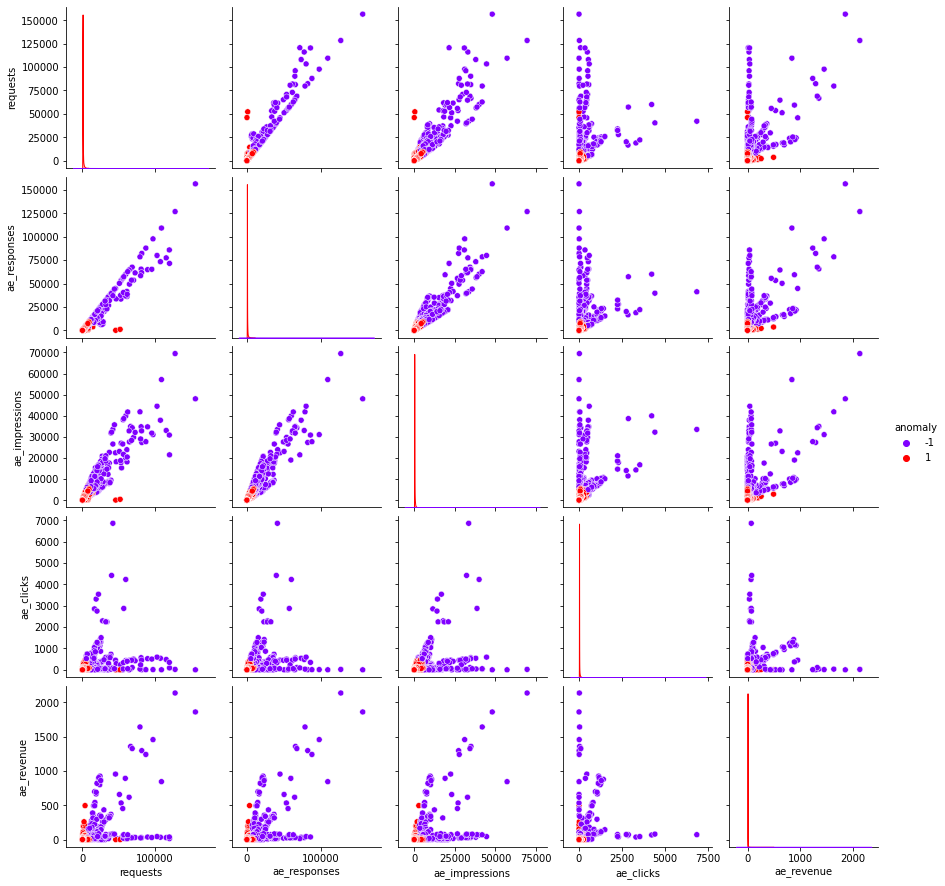

In [18]:
sns.pairplot(ADX_data, vars = inputs,hue='anomaly',palette='rainbow')

It is observed that when there are more number of requests the clicks, impressions, responses and revenue gets influenced.